In [2]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


## Single Sphere
Here we see that the coupled dipole model holds very well for a sphere with radius 50 nm or less. Once above 50 nm, the quadrupole begins growing in. By 90 nm sphere, the quadrupole peak is of higher intensity than the dipole. 

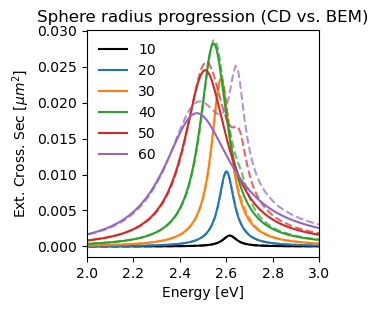

In [24]:
num = 1
w_all = np.arange(1,3.5,.005)/hbar_eVs

def make_sphere_input(radius, N=num):
    def_centers = np.zeros((N, 3))
    def_orient = np.zeros(N)
    def_all_radii = np.zeros(N)
    def_centers[0,:] = np.array([ 0, 0, 0 ])*1.E-7
    def_orient[0] = 0
    def_all_radii[0] = radius*1.E-7
    return def_centers, def_orient, def_all_radii

fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)
colorscheme = ['black','tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
pick_color = 0
for pick_radius in range(10, 61, 10):
    def_centers, def_orients, def_all_radii = make_sphere_input(radius=pick_radius)
    calc_dips = CrossSections(centers=def_centers, 
                                       all_radii=def_all_radii, 
                                       w=w_all,
                                       num=num, 
                                       n=1.0, 
                                       wp=8.959/hbar_eVs, 
                                       eps_inf=9.695, 
                                       gam_drude=0.073/hbar_eVs)    
    

    Pext, Pabs = calc_dips.cross_sects(drive=np.array([0, 0, 1]))
    plt.plot(w_all*hbar_eVs, Pabs,label=str(pick_radius),color=colorscheme[pick_color], alpha=.7) 

    data = loadmat(str('check_with_simulation/single_sphere/Spectrum_sph_ret_')+str(pick_radius)+str('nm_drude_n1.0.mat'))
    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    plt.legend(frameon=False)
    plt.title('Sphere radius progression (CD vs. BEM)')
    plt.ylabel('Ext. Cross. Sec [$\mu m^2$]')
    plt.xlabel('Energy [eV]')
    plt.xlim([2,3])

## Sphere Homodimer

In [27]:
num = 2
def make_spherehomodimer_input(radius, gap, N=num):
    def_centers = np.zeros((N, 3))
    def_all_radii = np.zeros((N))
    def_centers[0,:] = np.array([ 0, 0, -radius-gap/2 ])*1.E-7
    def_centers[1,:] = np.array([ 0, 0, radius+gap/2 ])*1.E-7
    def_all_radii[0] = radius*1.E-7
    def_all_radii[1] = radius*1.E-7
    return def_centers, def_all_radii

(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)


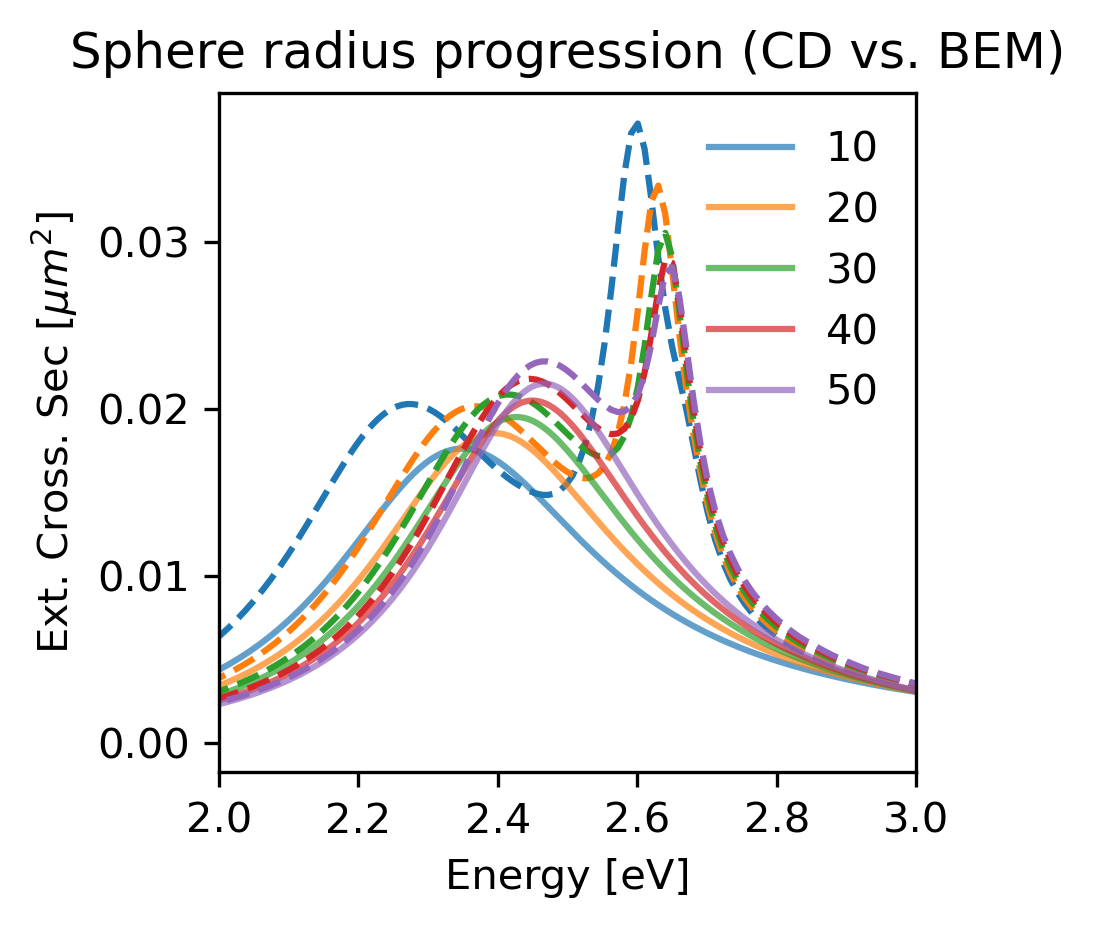

In [32]:
fig = plt.figure(figsize=(3.,3.), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)
colorscheme = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
pick_color = 0
pick_radius = 50

w_all = np.arange(1,3.5,.005)/hbar_eVs
for pick_gap in range(10, 51, 10):
    def_centers, def_all_radii = make_spherehomodimer_input(radius=pick_radius, gap=pick_gap)
    calc_dips = CrossSections(centers=def_centers, 
                                       all_radii=def_all_radii, 
                                       w=w_all,
                                       num=num, 
                                       n=1.0, 
                                       wp=8.959/hbar_eVs, 
                                       eps_inf=9.695, 
                                       gam_drude=0.073/hbar_eVs)    
    
    Pext, Pabs = calc_dips.cross_sects(drive=np.array([0, 0, 1]))
    plt.plot(w_all*hbar_eVs, np.sum(Pabs,axis=1), label=str(pick_gap),color=colorscheme[pick_color], alpha=.7) 

    data = loadmat(str('check_with_simulation/sphere_homodimer/Spectrum_sph_ret_gap')+str(pick_gap)+str('nm_')+str(pick_radius)+str('nm_drude_n1.0.mat'))
    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    plt.legend(frameon=False)
    plt.title('Sphere radius progression (CD vs. BEM)')
    plt.ylabel('Ext. Cross. Sec [$\mu m^2$]')
    plt.xlabel('Energy [eV]')
    plt.xlim([2.,3])    
    
    